
1.
---



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/content/Students_Performance (1).csv')

In [35]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [36]:
# Task a: Find out how many males and females participated in the test
gender_count = df['gender'].value_counts()
print("Number of Males:", gender_count['male'])
print("Number of Females:", gender_count['female'])

Number of Males: 482
Number of Females: 518


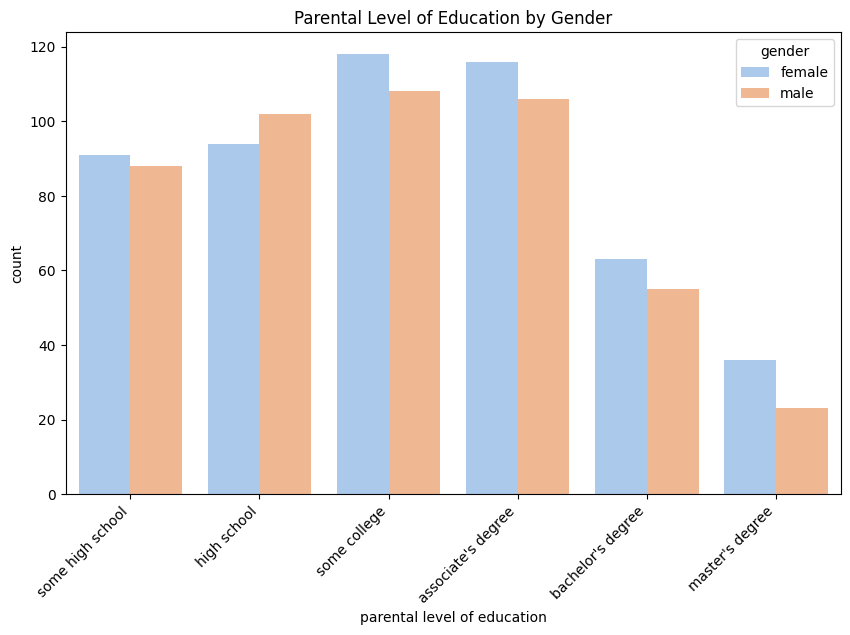

In [37]:
# Task b: Explore parental level of education
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=df, hue='gender', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Parental Level of Education by Gender')
plt.show()

In [38]:
# Task c: Average scores based on Gender and Test preparation course
average_scores_gender = df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]
average_scores_test_prep = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]

print("Average Scores based on Gender:")
print(average_scores_gender)

print("\nAverage Scores based on Test Preparation Course:")
print(average_scores_test_prep)


Average Scores based on Gender:
        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058

Average Scores based on Test Preparation Course:
                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


<ipython-input-38-c285566372d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores_gender = df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]
<ipython-input-38-c285566372d5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores_test_prep = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]


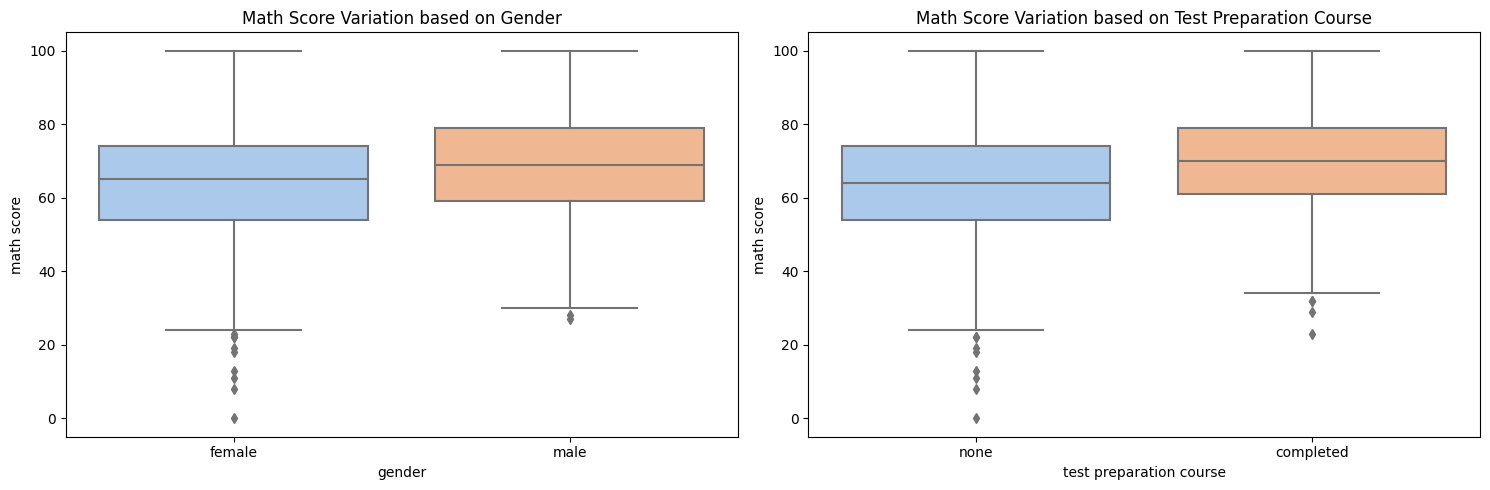

In [39]:
# Task d: Scoring variation based on Gender and Test preparation course
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
plt.title('Math Score Variation based on Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='test preparation course', y='math score', data=df, palette='pastel')
plt.title('Math Score Variation based on Test Preparation Course')

plt.tight_layout()
plt.show()

In [40]:
# Task e: Bonus points for the top 25% of students based on math score
top_25_percent = df[df['math score'] >= df['math score'].quantile(0.75)]
print("Students in the top 25% based on math score:")
print(top_25_percent[['gender', 'math score']])

Students in the top 25% based on math score:
     gender  math score
414  female          77
415  female          77
416  female          77
417  female          77
418  female          77
..      ...         ...
995    male          99
996    male         100
997    male         100
998    male         100
999    male         100

[255 rows x 2 columns]


### 2.Case Study on Testing of Hypothesis

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('/content/Sales_add (1).csv')


In [51]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes
None


In [52]:
# Display column names
print(df.columns)


Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')


In [53]:
sales_before_digital = df['Sales_before_digital_add(in $)']
sales_after_digital = df['Sales_After_digital_add(in $)']

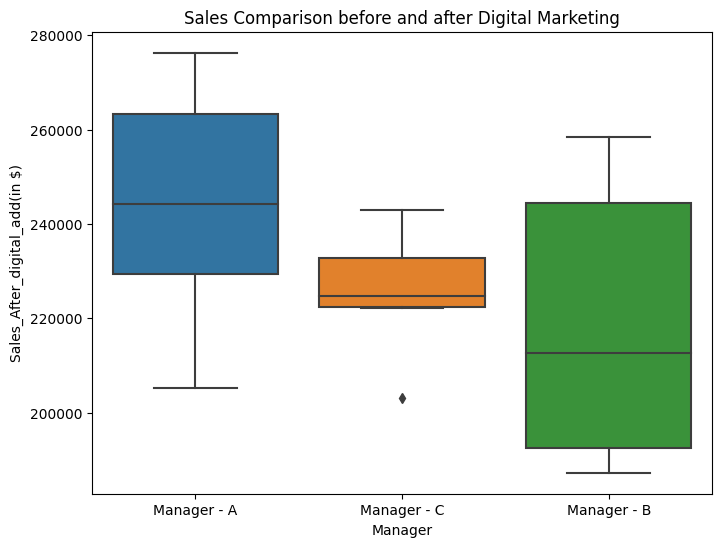

In [54]:
# Display boxplots for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Manager', y='Sales_After_digital_add(in $)', data=df)
plt.title('Sales Comparison before and after Digital Marketing')
plt.show()


In [55]:
# Create a contingency table
contingency_table = pd.crosstab(df['Region'], df['Manager'])

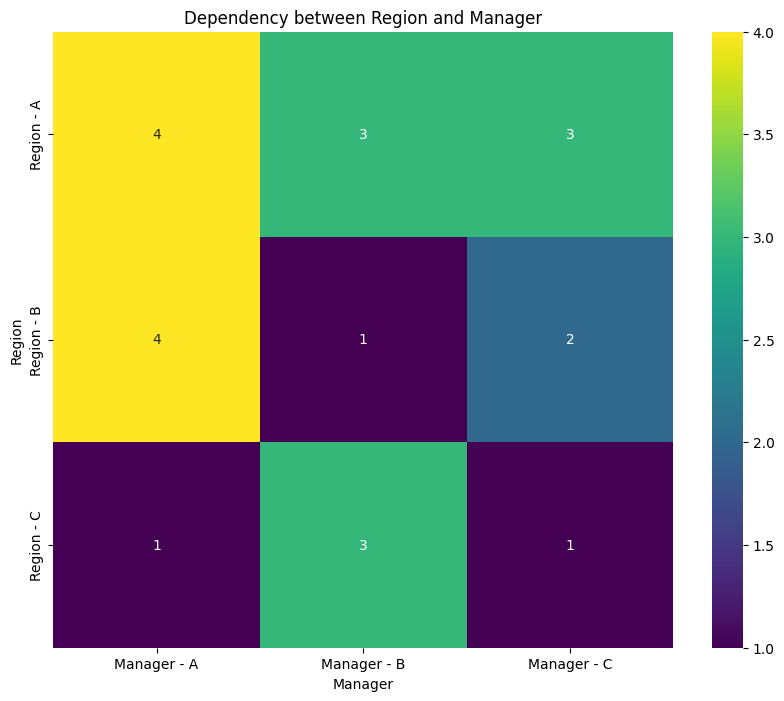

In [56]:
# Additional visual representation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Dependency between Region and Manager')
plt.show()